## Ejercicio de Raíces

In [42]:
def f(x):
  return x**3 + 2*x**2 - 5*x

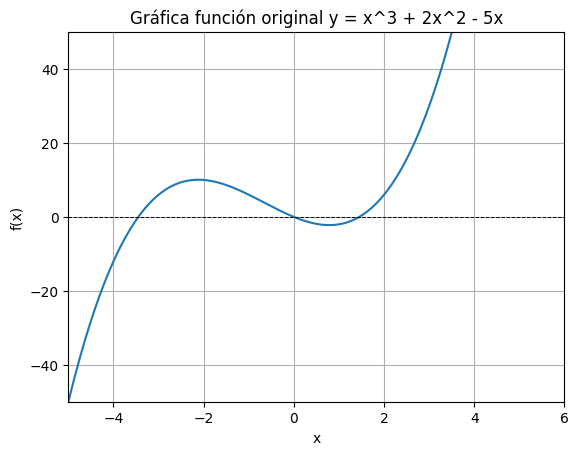

In [43]:
# Gráfica de la función y = x^3 + 2x^2 - 5x
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-9, 9, 500)
y = f(x)

plt.plot(x, y)
plt.xlim([-5,6])    # Rango de x de -5 a 5
plt.ylim([-50, 50])    # Rango de y ajustado para este rango de x (aproximado, puedes ajustarlo más)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica función original y = x^3 + 2x^2 - 5x')
plt.grid(True)
plt.show()

In [44]:
# Meotodo de la bisección
from scipy import optimize
import numpy as np

intervalos_busqueda = [(-4, -2), (0, 1), (1, 3)]

raices_encontradas = []

for intervalo in intervalos_busqueda:
  a, b = intervalo
  try:
    # Usar optimize.bisect para encontrar una raíz en el intervalo [a, b]
    root = optimize.bisect(f, a, b, xtol=2e-12)
    raices_encontradas.append(root)
    print(f"Raíz encontrada en el intervalo [{a}, {b}]: {root:.12f}")
  except ValueError as e:
    print(f"Error en el intervalo [{a}, {b}]: {e} (probablemente no hay cambio de signo)")

Raíz encontrada en el intervalo [-4, -2]: -3.449489742785
Raíz encontrada en el intervalo [0, 1]: 0.000000000000
Raíz encontrada en el intervalo [1, 3]: 1.449489742785


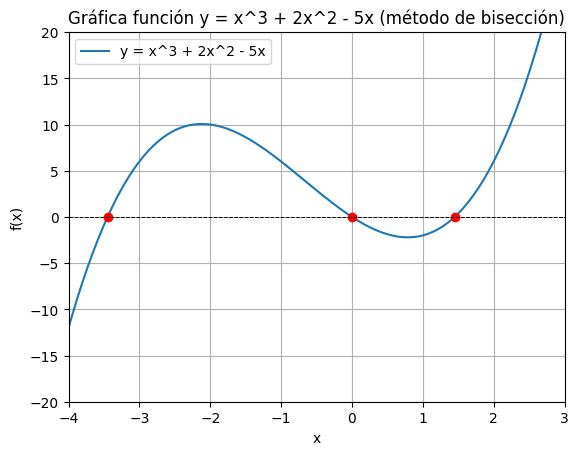

In [45]:
# Gráfica de la función y = x^3 + 2x^2 - 5x con las raíces encontradas por el método de bisección
plt.plot(x, y, label='y = x^3 + 2x^2 - 5x')
plt.xlim([-4, 3])    # Rango de x de -5 a 5
plt.ylim([-20, 20])  # Rango de y ajustado para este rango de x (aproximado, puedes ajustarlo más)

# Añadir las raíces encontradas a la gráfica
for raiz in raices_encontradas:
    plt.plot(raiz, f(raiz), 'ro')  # 'ro' es el color rojo para las raíces

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica función y = x^3 + 2x^2 - 5x (método de bisección)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
def f_prima(x):
  return 3*x**2 + 4*x - 5

In [30]:
# Metodo de Newton-Raphson
from scipy import optimize
import numpy as np

# Aproximaciones iniciales para Newton-Raphson. Estos valores son cruciales
# y deben ser elegidos cerca de las raíces (puedes usar la gráfica para estimarlos).
initial_guesses = [-4, -3, -2.8, 0.5, 0.75, 1.5] # Según la gráfica

raices_encontradas = []
tolerancia_raiz = 1e-6 # Tolerancia para considerar raíces como iguales

for x0 in initial_guesses:
    try:
        root = optimize.newton(f, x0, fprime=f_prima, tol=tolerancia_raiz, maxiter=100)
        raiz_aproximada = round(root, 6) # Redondear para comparación y presentación

        es_nueva_raiz = True
        for raiz_existente in raices_encontradas:
            if np.isclose(raiz_aproximada, raiz_existente, atol=tolerancia_raiz):
                es_nueva_raiz = False
                break # Ya se encontró una raíz similar
        if es_nueva_raiz:
            raices_encontradas.append(raiz_aproximada)
            print(f"Raíz encontrada con inicio en x0 = {x0}: {raiz_aproximada:.6f}")
        else:
            print(f"Raíz repetida (o muy cercana) encontrada con inicio en x0 = {x0}: {raiz_aproximada:.6f}")

    except RuntimeError as e: # Capturar errores de no convergencia
        print(f"Error con inicio en x0 = {x0}: {e}")
    except Exception as e: # Capturar otros posibles errores
        print(f"Error inesperado con inicio en x0 = {x0}: {e}")


print("\nTodas las raíces únicas encontradas (aproximadas):")
for raiz in raices_encontradas:
    print(f"- {raiz:.6f}")

Raíz encontrada con inicio en x0 = -4: -3.449490
Raíz repetida (o muy cercana) encontrada con inicio en x0 = -3: -3.449490
Raíz repetida (o muy cercana) encontrada con inicio en x0 = -2.8: -3.449490
Raíz encontrada con inicio en x0 = 0.5: -0.000000
Raíz repetida (o muy cercana) encontrada con inicio en x0 = 0.75: -3.449490
Raíz encontrada con inicio en x0 = 1.5: 1.449490

Todas las raíces únicas encontradas (aproximadas):
- -3.449490
- -0.000000
- 1.449490


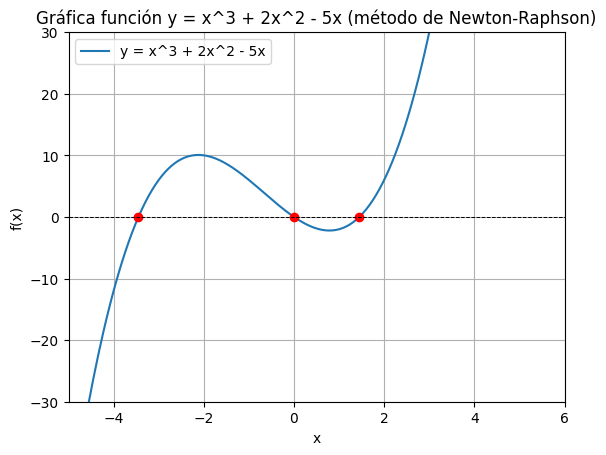

In [48]:
# Gráfica de la función y = x^3 + 2x^2 - 5x con las raíces encontradas por el método de Newton-Raphson
plt.plot(x, y, label='y = x^3 + 2x^2 - 5x')
plt.xlim([-5, 6])    # Rango de x de -5 a 5
plt.ylim([-30, 30])  # Rango de y ajustado para este rango de x (aproximado, puedes ajustarlo más)

# Añadir las raíces encontradas a la gráfica
for raiz in raices_encontradas:
    plt.plot(raiz, f(raiz), 'ro')  # 'ro' es el color rojo para las raíces

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica función y = x^3 + 2x^2 - 5x (método de Newton-Raphson)')
plt.legend()
plt.grid(True)
plt.show()